In [1]:
import sys
sys.path.append('../input/multilabelstraifier/')
from ml_stratifiers import MultilabelStratifiedKFold

import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
DIR = "../input/moa-ensemble-check/"
check_mlp = pd.read_csv(DIR+"mlp_oof2.csv")
check_tabnet_val = pd.read_csv(DIR+"tab_newval_oof.csv").drop("sig_id", axis=1)
check_svm = pd.read_csv(DIR+"svm_newval_oof.csv")
check_lstm = pd.read_csv(DIR+"lstm_newval_oof.csv").drop("sig_id", axis=1)

y = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
targets = pd.read_csv('../input/lish-moa/train_targets_scored.csv').drop("sig_id", axis=1)
train = pd.read_csv('../input/lish-moa/train_features.csv')
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

#mlp = pd.read_csv(DIR+"mlp1840.csv")
#check_tabnet = pd.read_csv(DIR+"tab_oof2.csv")
#tab = pd.read_csv(DIR+"sub_tab1859.csv")
#xgb = pd.read_csv(DIR+"xgb1951.csv")
#check_xgb = pd.read_csv(DIR+"xgb_oof.csv")

In [2]:
cons_train_index = train[train.cp_type!="ctl_vehicle"].index

In [3]:
y = y.loc[y.index.isin(cons_train_index),:]

In [4]:
corr_df = y.corr().abs()
corr_df

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
5-alpha_reductase_inhibitor,1.000000,0.000798,0.000921,0.002602,0.003283,0.001608,0.001383,0.001845,0.000651,0.003107,...,0.000460,0.000940,0.001303,0.003365,0.001608,0.000460,0.002460,0.000959,0.001175,0.001030
11-beta-hsd1_inhibitor,0.000798,1.000000,0.000948,0.002677,0.003378,0.164210,0.001423,0.001899,0.000670,0.003197,...,0.000474,0.000967,0.001341,0.003463,0.001655,0.000474,0.002531,0.000987,0.001209,0.001060
acat_inhibitor,0.000921,0.000948,1.000000,0.003092,0.003901,0.001911,0.001643,0.002193,0.000774,0.003692,...,0.000547,0.001117,0.001549,0.003999,0.001911,0.000547,0.002923,0.001139,0.001396,0.001224
acetylcholine_receptor_agonist,0.002602,0.002677,0.003092,1.000000,0.011019,0.005398,0.004641,0.006194,0.002186,0.010429,...,0.001545,0.003156,0.004375,0.011294,0.005398,0.001545,0.008256,0.003218,0.003943,0.003457
acetylcholine_receptor_antagonist,0.003283,0.003378,0.003901,0.011019,1.000000,0.006812,0.005856,0.007816,0.002758,0.013160,...,0.001950,0.003982,0.005521,0.014252,0.006812,0.001950,0.010418,0.004061,0.004975,0.004363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,0.000460,0.000474,0.000547,0.001545,0.001950,0.000955,0.000821,0.001096,0.000387,0.001845,...,0.000273,0.000558,0.000774,0.001999,0.000955,1.000000,0.001461,0.000569,0.000698,0.000612
vegfr_inhibitor,0.002460,0.002531,0.002923,0.008256,0.010418,0.005104,0.004388,0.005856,0.002066,0.009860,...,0.001461,0.002984,0.004136,0.010679,0.005104,0.001461,1.000000,0.003043,0.003728,0.003269
vitamin_b,0.000959,0.000987,0.001139,0.003218,0.004061,0.001989,0.001710,0.002283,0.000805,0.003843,...,0.000569,0.001163,0.001612,0.004162,0.001989,0.000569,0.003043,1.000000,0.001453,0.001274
vitamin_d_receptor_agonist,0.001175,0.001209,0.001396,0.003943,0.004975,0.002437,0.002095,0.002796,0.000987,0.004709,...,0.000698,0.001425,0.001975,0.005099,0.002437,0.000698,0.003728,0.001453,1.000000,0.001561


In [5]:
p_min = 0.001
p_max = 1 - p_min

check_svm2 = check_svm.copy()
check_svm2.loc[cons_train_index,:]= np.clip(check_svm2.loc[cons_train_index,:], p_min, p_max)

check_tabnet_val2 = check_tabnet_val.copy()
check_tabnet_val2.loc[cons_train_index,:] = np.clip(check_tabnet_val.loc[cons_train_index,:], p_min, p_max)

# output correlation check

In [6]:
#print(mlp.corrwith(xgb).max(), mlp.corrwith(xgb).min(), mlp.corrwith(xgb).mean(), mlp.corrwith(xgb).std())
#print(mlp.corrwith(tab).max(), mlp.corrwith(tab).min(), mlp.corrwith(tab).mean(), mlp.corrwith(tab).std()) 
#print(xgb.corrwith(tab).max(), xgb.corrwith(tab).min(), xgb.corrwith(tab).mean(), xgb.corrwith(tab).std())
#print(mlp.corrwith(tl).max(), mlp.corrwith(tl).min(), mlp.corrwith(tl).mean(), mlp.corrwith(tl).std())
#print(tl.corrwith(tab).max(), tl.corrwith(tab).min(), tl.corrwith(tab).mean(), tl.corrwith(tab).std()) 
#print(xgb.corrwith(tl).max(), xgb.corrwith(tl).min(), xgb.corrwith(tl).mean(), xgb.corrwith(tl).std())

NameError: name 'mlp' is not defined

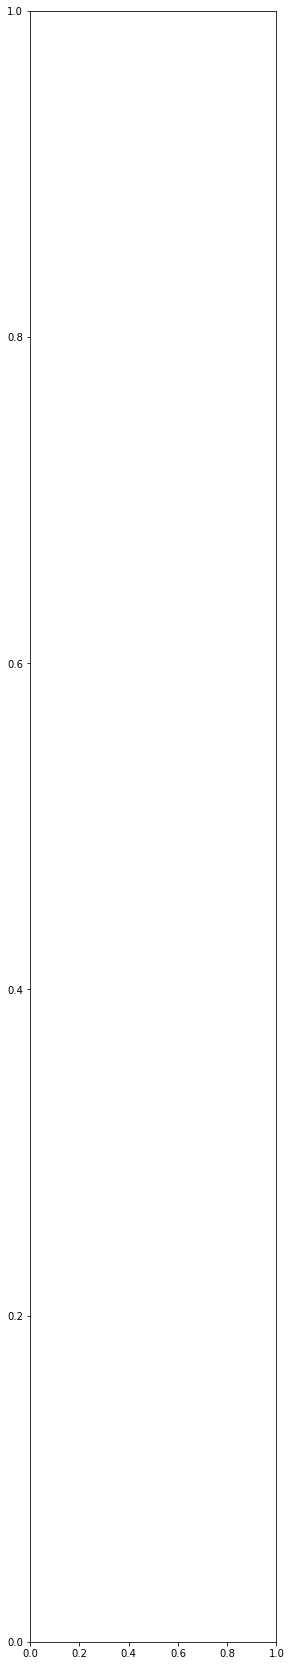

In [7]:
plt.figure(figsize=(15,30))
plt.subplot(1,3,1)
mlp.corrwith(xgb).plot(kind="barh")
plt.subplot(1,3,2)
#plt.axis('off')
mlp.corrwith(tab).plot(kind="barh",sharey=True)
plt.subplot(1,3,3)
#plt.axis('off')
xgb.corrwith(tab).plot(kind="barh",sharey=True)

In [8]:
check_tabnet_val2 = pd.DataFrame(np.array(check_tabnet_val2))
check_tabnet_val2

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,0.00100,0.001732,0.001283,0.013606,0.040014,0.005768,0.003474,0.002616,0.001000,0.010460,...,0.001,0.001000,0.002065,0.001571,0.001000,0.001000,0.001000,0.001223,0.001000,0.001000
1,0.00100,0.001000,0.001562,0.012176,0.010442,0.001700,0.002802,0.003355,0.001000,0.012524,...,0.001,0.001000,0.002306,0.001000,0.001000,0.001000,0.001156,0.001130,0.005260,0.001809
2,0.00100,0.001069,0.001250,0.003281,0.010883,0.001295,0.002225,0.007531,0.001414,0.014370,...,0.001,0.002657,0.001492,0.001000,0.005148,0.001046,0.008248,0.001935,0.001000,0.002663
3,0.00100,0.001000,0.001000,0.001000,0.007451,0.001252,0.001000,0.001000,0.001000,0.001000,...,0.001,0.014328,0.001000,0.485110,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.00100,0.001354,0.001524,0.005568,0.007144,0.002717,0.004062,0.002263,0.001000,0.015926,...,0.001,0.001580,0.004425,0.001000,0.001217,0.001000,0.001000,0.001468,0.001218,0.002529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.00203,0.001482,0.001596,0.004349,0.009858,0.001983,0.002405,0.001447,0.001000,0.007262,...,0.001,0.001000,0.002777,0.001000,0.001071,0.001429,0.001000,0.001484,0.001000,0.001687
23810,0.00100,0.001000,0.003796,0.004223,0.001720,0.001798,0.001000,0.005082,0.001000,0.001538,...,0.001,0.001000,0.002521,0.001000,0.009547,0.001000,0.038947,0.001000,0.030975,0.003454
23811,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23812,0.00100,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001,0.001000,0.001000,0.001000,0.002579,0.001000,0.002323,0.001000,0.001000,0.001000


In [9]:
result = []
for i in range(206):
    result.append(np.corrcoef(check_mlp.iloc[:,i], check_tabnet_val.iloc[:,i])[0,1])
print(np.max(result), np.min(result), np.mean(result), np.std(result))
print(check_mlp.corrwith(check_svm).max(), check_mlp.corrwith(check_svm).min(), 
      check_mlp.corrwith(check_svm).mean(), check_mlp.corrwith(check_svm).std())
result = []
for i in range(206):
    result.append(np.corrcoef(check_mlp.iloc[:,i], check_lstm.iloc[:,i])[0,1])
print(np.max(result), np.min(result), np.mean(result), np.std(result))
result = []
for i in range(206):
    result.append(np.corrcoef(check_tabnet_val.iloc[:,i], check_lstm.iloc[:,i])[0,1])
print(np.max(result), np.min(result), np.mean(result), np.std(result))
print(check_tabnet_val.corrwith(check_svm).max(), check_tabnet_val.corrwith(check_svm).min(), 
      check_tabnet_val.corrwith(check_svm).mean(), check_tabnet_val.corrwith(check_svm).std())

0.9919723868923821 0.046988847768357364 0.5022524985291136 0.18286347299473651
0.9972791142644268 0.024753907990063936 0.4837869535843897 0.22075097599019858
0.9962401821655638 0.26600567549902615 0.6426870557444149 0.14856098359279166
0.9903191277853431 0.0850975875051259 0.5027917011654656 0.1570402691207024
nan nan nan nan


# ensemble ratio

In [10]:
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_mlp)))
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_tabnet_val)))
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_tabnet_val2)))

OOF log loss:  0.01567181329219744
OOF log loss:  0.016317946358678424
OOF log loss:  0.016348356242888194


# simple average

In [11]:
check = 0.5 * check_tabnet_val2.values + 0.5 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.01568264931607268


In [12]:
check = 0.3 * check_svm + 0.2 * check_tabnet_val2.values + 0.5 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.01556003737535406


# weight average

In [13]:
check = 0.2 * check_tabnet_val2.values + 0.8 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.015605002507425797


In [14]:
check = 0.1 * check_svm2.values + 0.2 * check_tabnet_val2.values + 0.7 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.015576608185505743


In [15]:
check_score = pd.read_csv('../input/lish-moa/train_targets_scored.csv').drop("sig_id", axis=1)
target_feats = [ i for i in check_score.columns if i != "sig_id"]
from scipy.optimize import minimize, fsolve


blend_train = []

# out of fold prediction
blend_train.append(np.array(check_tabnet))
blend_train.append(np.array(check_mlp))
blend_train = np.array(blend_train)
check_xgb2 = np.array(check_xgb2)

ratio = 0.01

np.random.seed(224)
total_scores = []
for i in range(len(target_feats)):
    def log_loss_func(weights):
        final_prediction = ratio * check_xgb2[:,i]
        for weight, prediction in zip(weights, blend_train):
            final_prediction += weight * prediction[:,i]
        return log_loss(np.ravel(targets.iloc[:,i]), np.ravel(final_prediction))
    
    best_score = np.inf
    best_weights = [0] * len(blend_train)
    for k in range(10):
        starting_values = np.random.rand(len(blend_train))
        starting_values /= sum(starting_values)
        bounds = [(0, 1)] * len(blend_train)
        cons = ({'type': 'eq', 'fun': lambda x:  1 - ratio - sum(x)}) 
            
        res = minimize(log_loss_func,
                   starting_values,
                   method='SLSQP',
                   bounds=bounds,
                   constraints = cons) 
        
        if best_score > res["fun"]:
            best_score = res["fun"]
            best_weights = res["x"]
        
    valid_prediction = ratio * check_xgb2[:,i]
    for weight, prediction in zip(best_weights, blend_train):
        valid_prediction += weight * prediction[:,i]
    print('Score: {}, Weights: {}'.format(round(res['fun'],8), res['x']))
    total_scores.append(res['fun'])
    check_score.loc[:,target_feats[i]] = valid_prediction
    
    #oof_test = svm_ratio * svm1_test[:,i]
    #for weight, prediction in zip(best_weights, blend_test):
    #    oof_test += weight * prediction[:,i]
        

print("final ensemble oof score:", np.mean(total_scores))
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_score)))

NameError: name 'check_tabnet' is not defined

# geometric average

In [16]:
check = np.sqrt(np.multiply(check_tabnet_val2.values, check_mlp))
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.01573825399391786


# harmonic average

In [17]:
check_tmp = 1/((1 / check_mlp.loc[cons_train_index,:] + 1 / check_tabnet_val2.loc[cons_train_index,:].values)/2)
check = check_mlp.copy()
check.loc[cons_train_index,:] = check_tmp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.01587226416288096


# n multiply average

In [18]:
num = 4
check = ((check_tabnet_val2.values ** num + check_mlp ** num)/2) ** (1/num)
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.015761550155079584


# folds vs target

In [19]:
def make_folds(num_splits, seed, train_score, drug):
    folds = []
    
    # LOAD FILES
    targets = train_score.columns[1:]
    train_score = train_score.merge(drug, on='sig_id', how='left') 

    # LOCATE DRUGS
    vc = train_score.drug_id.value_counts()
    vc1 = vc.loc[vc <= 19].index.sort_values()
    vc2 = vc.loc[vc > 19].index.sort_values()

    # STRATIFY DRUGS 18X OR LESS
    dct1 = {}; dct2 = {}
    skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed) #MultilabelStratifiedKFold
    tmp = train_score.groupby('drug_id')[targets].mean().loc[vc1]
    for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
        dd = {k:fold for k in tmp.index[idxV].values}
        dct1.update(dd)
        
    # STRATIFY DRUGS MORE THAN 18X
    skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed)
    tmp = train_score.loc[train_score.drug_id.isin(vc2)].reset_index(drop = True)
    for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
        dd = {k:fold for k in tmp.sig_id[idxV].values}
        dct2.update(dd)

    # ASSIGN FOLDS
    train_score['fold'] = train_score.drug_id.map(dct1)
    train_score.loc[train_score.fold.isna(),'fold'] =\
        train_score.loc[train_score.fold.isna(),'sig_id'].map(dct2)
    train_score.fold = train_score.fold.astype('int8')
    folds.append(train_score.fold.values)
    
    return np.array(folds)

In [20]:
target_feats = [i for i in targets.columns if i != "sig_id"]

mlp_folds = make_folds(7, 34, y, drug)
tab_folds = make_folds(5, 14, y, drug)

check_dist = y.copy()
check_dist["mlp_fold"] = np.array(mlp_folds).reshape(-1,1)
check_dist["tab_fold"] = np.array(tab_folds).reshape(-1,1)

mlp_unbalanced_feats = []
tab_unbalanced_feats = []
for i in target_feats:
    if np.max(check_dist.loc[:,[i]+["mlp_fold"]].groupby("mlp_fold").sum()).values[0] == check_dist[i].sum() and check_dist[i].sum()>=5:
        mlp_unbalanced_feats.append(i)
    if np.max(check_dist.loc[:,[i]+["tab_fold"]].groupby("tab_fold").sum()).values[0] == check_dist[i].sum() and check_dist[i].sum()>=5:        
        tab_unbalanced_feats.append(i)

In [21]:
len(mlp_unbalanced_feats), len(tab_unbalanced_feats)

(17, 17)

In [22]:
unbalanced_feats = set(mlp_unbalanced_feats) & set(tab_unbalanced_feats)
unbalanced_feats = list(unbalanced_feats)
print(len(unbalanced_feats))

17


In [23]:
y[unbalanced_feats].sum() #これだけの変数が1foldに偏っている。

calcineurin_inhibitor                    6
atm_kinase_inhibitor                     6
antiarrhythmic                           6
leukotriene_inhibitor                    6
nicotinic_receptor_agonist               6
tropomyosin_receptor_kinase_inhibitor    6
autotaxin_inhibitor                      6
diuretic                                 6
steroid                                  6
elastase_inhibitor                       6
aldehyde_dehydrogenase_inhibitor         7
coagulation_factor_inhibitor             6
retinoid_receptor_antagonist             6
protein_phosphatase_inhibitor            6
laxative                                 6
lxr_agonist                              6
ubiquitin_specific_protease_inhibitor    6
dtype: int64

In [24]:
check_dist = check_dist.merge(drug, on='sig_id', how='left') 
for i in unbalanced_feats:
    print(check_dist[check_dist[i] ==1]["drug_id"].value_counts())

4c33b6fa1    6
Name: drug_id, dtype: int64
4c5736ff6    6
Name: drug_id, dtype: int64
a4797398a    6
Name: drug_id, dtype: int64
031afe482    6
Name: drug_id, dtype: int64
6a3bdd1f3    6
Name: drug_id, dtype: int64
827cc5d8d    6
Name: drug_id, dtype: int64
28fff865d    6
Name: drug_id, dtype: int64
84d4ecc6a    6
Name: drug_id, dtype: int64
83d61e159    6
Name: drug_id, dtype: int64
4412f3146    6
Name: drug_id, dtype: int64
5735a3e0f    7
Name: drug_id, dtype: int64
9a4100e20    6
Name: drug_id, dtype: int64
7614ec763    6
Name: drug_id, dtype: int64
7e6b66a8f    6
Name: drug_id, dtype: int64
fe17b8b65    6
Name: drug_id, dtype: int64
c5b47d91c    6
Name: drug_id, dtype: int64
2fe75eb73    6
Name: drug_id, dtype: int64


In [25]:
for i in unbalanced_feats:
    print(i, np.sort((corr_df[i]))[-2])

calcineurin_inhibitor 0.0032824140001210746
atm_kinase_inhibitor 0.003282414000121188
antiarrhythmic 0.0032824140001209813
leukotriene_inhibitor 0.003282414000121091
nicotinic_receptor_agonist 0.0032824140001219797
tropomyosin_receptor_kinase_inhibitor 0.0032824140001208725
autotaxin_inhibitor 0.003282414000122102
diuretic 0.0032824140001220894
steroid 0.0032824140001213318
elastase_inhibitor 0.003282414000121105
aldehyde_dehydrogenase_inhibitor 0.5289331650205753
coagulation_factor_inhibitor 0.0032824140001212424
retinoid_receptor_antagonist 0.003282414000120655
protein_phosphatase_inhibitor 0.0032824140001210854
laxative 0.0032824140001217017
lxr_agonist 0.00328241400012142
ubiquitin_specific_protease_inhibitor 0.003282414000120977


In [26]:
check_mlp_mod = check_mlp.copy()
for i in unbalanced_feats:
    print(i, check_mlp[i].max())

KeyError: 'calcineurin_inhibitor'

In [27]:
# 
check_mlp.columns = target_feats
for i in sorted(unbalanced_feats):
    print(log_loss(targets[i], check_mlp[i]), i)
    #print(log_loss(targets[i], check_tabnet_val2[i]), i)
    #print(log_loss(targets[i], (check_mlp[i] + check_tabnet_val[i])/2), i)

0.00304774833295979 aldehyde_dehydrogenase_inhibitor
0.0026752891651685012 antiarrhythmic
0.0027347305597657232 atm_kinase_inhibitor
0.0026826978087902548 autotaxin_inhibitor
0.0026670714137301023 calcineurin_inhibitor
0.0026752730510147755 coagulation_factor_inhibitor
0.002679615122249506 diuretic
0.002687043432788702 elastase_inhibitor
0.002670653710421615 laxative
0.002670359781157954 leukotriene_inhibitor
0.0027168156939604347 lxr_agonist
0.0026695575997467587 nicotinic_receptor_agonist
0.00271787353938845 protein_phosphatase_inhibitor
0.002691691625318644 retinoid_receptor_antagonist
0.0026705871988789865 steroid
0.0026875874477136096 tropomyosin_receptor_kinase_inhibitor
0.0026839362414972745 ubiquitin_specific_protease_inhibitor


In [28]:
np.corrcoef(check_mlp["aldehyde_dehydrogenase_inhibitor"], check_mlp["laxative"])

array([[1.        , 0.24097525],
       [0.24097525, 1.        ]])

In [29]:
0.0002 * 16 / 206

1.5533980582524273e-05